### Student Information
Name:Leo Lin

Student ID: 109003814

GitHub ID: leolin65

---

### Instructions

1. First: do the **take home** exercises in the [DM2022-Lab1-Master](https://github.com/keziatamus/DM2022-Lab1-Master). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2022-Lab1-Master](https://github.com/keziatamus/DM2022-Lab1-Master) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). The dataset contains a `sentence` and `score` label. Read the specificiations of the dataset for details. 
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be habdled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/keziatamus/DM2022-Lab1-Homework/blob/main/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 20th 11:59 pm, Thursday)__. 


# 1. The Data

 This dataset was created for the Paper 'From Group to Individual Labels using Deep Features', Kotzias et. al,. KDD 2015
Please cite the paper if you want to use it :)

It contains sentences labelled with positive or negative sentiment.

In [1]:
### Begin Assignment Here
# TEST necessary for when working with external scripts
%load_ext autoreload
%autoreload 2

In [2]:
#import library 
import pandas as pd
import helpers.data_mining_helpers as dmh
import numpy as np

## 2. Data Preparation

2.1 import each files into data frame (data file doesn't contain column name so give them header names)

In [3]:
columnname=["sentence","score"]
amazon = pd.read_table("D:\\NTHU\\111上\\DM2022\\sentiment_labelled_sentences\\amazon_cells_labelled.txt",header=None,names=columnname)
imdb= pd.read_table("D:\\NTHU\\111上\\DM2022\\sentiment_labelled_sentences\\imdb_labelled.txt",header=None,names=columnname)
yelp= pd.read_table("D:\\NTHU\\111上\\DM2022\\sentiment_labelled_sentences\\yelp_labelled.txt",header=None,names=columnname)

2.2 give company names into new column.

In [4]:
amazon['company'] ="amazon"
imdb['company'] ="imdb"
yelp['company'] ="yelp"

2.3 Merge all data togeteher for analyze & check lenght of the data

In [5]:
all_data=amazon.append([imdb,yelp])
print(len(all_data))

2748


C:\Users\LEOLIN_PC\AppData\Local\Temp\ipykernel_25068\1089993059.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_data=amazon.append([imdb,yelp])


Try display data

In [6]:
all_data[0:1]

,sentence,score,company
0,So there is no way for me to plug it in here i...,0,amazon


In [7]:
for t in all_data["sentence"][:3]:
    print(t)

So there is no way for me to plug it in here in the US unless I go by a converter.
Good case, Excellent value.
Great for the jawbone.


In [8]:
# a simple query
all_data[0:10][["sentence", "company"]]

,sentence,company
0,So there is no way for me to plug it in here i...,amazon
1,"Good case, Excellent value.",amazon
2,Great for the jawbone.,amazon
3,Tied to charger for conversations lasting more...,amazon
4,The mic is great.,amazon
5,I have to jiggle the plug to get it to line up...,amazon
6,If you have several dozen or several hundred c...,amazon
7,If you are Razr owner...you must have this!,amazon
8,"Needless to say, I wasted my money.",amazon
9,What a waste of money and time!.,amazon


In [9]:
all_data[-10:]

,sentence,score,company
990,The refried beans that came with my meal were ...,0,yelp
991,Spend your money and time some place else.,0,yelp
992,A lady at the table next to us found a live gr...,0,yelp
993,the presentation of the food was awful.,0,yelp
994,I can't tell you how disappointed I was.,0,yelp
995,I think food should have flavor and texture an...,0,yelp
996,Appetite instantly gone.,0,yelp
997,Overall I was not impressed and would not go b...,0,yelp
998,"The whole experience was underwhelming, and I ...",0,yelp
999,"Then, as if I hadn't wasted enough of my life ...",0,yelp


In [10]:
# using loc (by position)
all_data.iloc[::10, 0:2][0:30]

,sentence,score
0,So there is no way for me to plug it in here i...,0
10,And the sound quality is great.,1
20,I went on Motorola's website and followed all ...,0
30,"This is a simple little phone to use, but the ...",0
40,"It has a great camera thats 2MP, and the pics ...",1
50,Not loud enough and doesn't turn on like it sh...,0
60,Essentially you can forget Microsoft's tech su...,0
70,Mic Doesn't work.,0
80,I wear it everyday and it holds up very well.,1
90,For a product that costs as much as this one d...,0


In [11]:
# using loc (by label)
all_data.loc[::10, 'sentence'][0:30]

0      So there is no way for me to plug it in here i...
10                       And the sound quality is great.
20     I went on Motorola's website and followed all ...
30     This is a simple little phone to use, but the ...
40     It has a great camera thats 2MP, and the pics ...
50     Not loud enough and doesn't turn on like it sh...
60     Essentially you can forget Microsoft's tech su...
70                                     Mic Doesn't work.
80         I wear it everyday and it holds up very well.
90     For a product that costs as much as this one d...
100    Integrated seamlessly with the Motorola RAZR p...
110    Sound quality on both end is excellent, I use ...
120    I've tried several different earpieces for my ...
130    It is so small and you don't even realize that...
140                                        What a waste.
150                               I Was Hoping for More.
160    All I can do is whine on the Internet, so here...
170                           E

In [12]:
all_data[::30][0:30]

,sentence,score,company
0,So there is no way for me to plug it in here i...,0,amazon
30,"This is a simple little phone to use, but the ...",0,amazon
60,Essentially you can forget Microsoft's tech su...,0,amazon
90,For a product that costs as much as this one d...,0,amazon
120,I've tried several different earpieces for my ...,1,amazon
150,I Was Hoping for More.,0,amazon
180,Don't buy this product.,0,amazon
210,I did not bother contacting the company for fe...,0,amazon
240,Big Disappointment with calendar sync.,0,amazon
270,"Not only will it drain your player, but may al...",0,amazon


In [13]:
all_data.loc[lambda f:f.company=='amazon'].iloc[0:1000:3][1:50]

,sentence,score,company
3,Tied to charger for conversations lasting more...,0,amazon
6,If you have several dozen or several hundred c...,0,amazon
9,What a waste of money and time!.,0,amazon
12,If the two were seperated by a mere 5+ ft I st...,0,amazon
15,Highly recommend for any one who has a blue to...,1,amazon
18,Works great!.,1,amazon
21,I bought this to use with my Kindle Fire and a...,1,amazon
24,I bought it for my mother and she had a proble...,0,amazon
27,I didn't think that the instructions provided ...,0,amazon
30,"This is a simple little phone to use, but the ...",0,amazon


2.4 transform data score into column feel add text length into column

In [14]:
all_data['feel'] = np.where(all_data['score']==0, 'negative', 'positive')
all_data['Text_length']  = all_data['sentence'].str.len()

# 4. Data Mining using Pandas

1 Missing Values

check for missing record each row, there is no missing value.

In [15]:
all_data.isnull().apply(lambda x: dmh.check_missing_values(x))

,sentence,score,company,feel,Text_length
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,0,0,0


2 Dealing with Duplicate Data

try to find duplicate data but it's comment, it can be duplicate so leave it.

In [16]:
duplicateRows = all_data[all_data.duplicated()]
print(duplicateRows)

                                              sentence  score company  \
285                                      Great phone!.      1  amazon   
407                                       Works great.      1  amazon   
524                                      Works great!.      1  amazon   
543                            Don't buy this product.      0  amazon   
744  If you like a loud buzzing to override all you...      0  amazon   
748                                      Does not fit.      0  amazon   
778                              This is a great deal.      1  amazon   
792                                       Great Phone.      1  amazon   
892                   Excellent product for the price.      1  amazon   
896                                       Great phone.      1  amazon   
165                   Definitely worth checking out.        1    imdb   
387                                 Not recommended.        0    imdb   
590                                            10/1

In [17]:
all_data.drop_duplicates(keep=False, inplace=True) # delete redudant data
print(len(all_data))

2714


In [18]:
#check and preview data
all_data.groupby('company').describe()

score                                              Text_length  \
         count      mean       std  min  25%  50%  75%  max       count   
company                                                                   
amazon   980.0  0.495918  0.500239  0.0  0.0  0.0  1.0  1.0       980.0   
imdb     742.0  0.514825  0.500117  0.0  0.0  1.0  1.0  1.0       742.0   
yelp     992.0  0.502016  0.500248  0.0  0.0  1.0  1.0  1.0       992.0   

                                                                  
               mean         std   min   25%   50%    75%     max  
company                                                           
amazon    55.861224   34.561918  11.0  27.0  48.5   78.0   149.0  
imdb     111.730458  382.074139   8.0  43.0  73.0  113.0  7944.0  
yelp      58.606855   32.325830  11.0  33.0  52.0   80.0   149.0

# 5.  Data Preprocessing

#5.1 Sampling

In [19]:
all_data_sample = all_data.sample(n=500)

In [20]:
len(all_data_sample)

500

In [21]:
all_data_sample[0:]

,sentence,score,company,feel,Text_length
294,But this movie really got to me.,1,imdb,positive,34
913,How can you call yourself a steakhouse if you ...,0,yelp,negative,94
336,but the movie makes a lot of serious mistakes.,0,imdb,negative,48
431,His acting alongside Olivia De Havilland was b...,1,imdb,positive,86
155,This phone is very fast with sending any kind ...,1,amazon,positive,132
...,...,...,...,...,...
767,The block was amazing.,1,yelp,positive,22
75,The scallop dish is quite appalling for value ...,0,yelp,negative,54
817,Gets a signal when other Verizon phones won't.,1,amazon,positive,46
920,"Needless to say, I won't be going back anytime...",0,yelp,negative,52


In [22]:
import matplotlib.pyplot as plt
%matplotlib inline

Draw graph to see the distribution of data between 3 companies

company  feel    
amazon   negative    494
         positive    486
imdb     positive    382
         negative    360
yelp     positive    498
         negative    494
Name: feel, dtype: int64


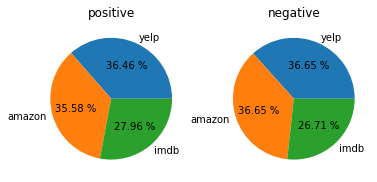

In [23]:
plt.subplot(1,2,1)
pos=all_data.loc[(all_data['feel']=='positive')]
label=["yelp","amazon","imdb"]
p=pos.company.value_counts()
aaa=plt.pie(p,labels=label,autopct='%.2f %%')
plt.title('positive')
plt.subplot(1, 2, 2)
neg=all_data.loc[(all_data['feel']=='negative')]
label=["yelp","amazon","imdb"]
n=neg.company.value_counts()
sss=plt.pie(n,labels=label,autopct='%.2f %%')
plt.title('negative')
print(all_data.groupby('company')['feel'].value_counts())

# 5.2 Feature Creation

 extract all the words found in each text and append it as a new feature to the pandas dataframe.(tokenizing our text)

In [24]:
import nltk

In [25]:
all_data['unigrams'] = all_data['sentence'].apply(lambda x: dmh.tokenize_text(x))

In [26]:
all_data[0:30]

,sentence,score,company,feel,Text_length,unigrams
0,So there is no way for me to plug it in here i...,0,amazon,negative,82,"[So, there, is, no, way, for, me, to, plug, it..."
1,"Good case, Excellent value.",1,amazon,positive,27,"[Good, case, ,, Excellent, value, .]"
2,Great for the jawbone.,1,amazon,positive,22,"[Great, for, the, jawbone, .]"
3,Tied to charger for conversations lasting more...,0,amazon,negative,79,"[Tied, to, charger, for, conversations, lastin..."
4,The mic is great.,1,amazon,positive,17,"[The, mic, is, great, .]"
5,I have to jiggle the plug to get it to line up...,0,amazon,negative,74,"[I, have, to, jiggle, the, plug, to, get, it, ..."
6,If you have several dozen or several hundred c...,0,amazon,negative,111,"[If, you, have, several, dozen, or, several, h..."
7,If you are Razr owner...you must have this!,1,amazon,positive,43,"[If, you, are, Razr, owner, ..., you, must, ha..."
8,"Needless to say, I wasted my money.",0,amazon,negative,35,"[Needless, to, say, ,, I, wasted, my, money, .]"
9,What a waste of money and time!.,0,amazon,negative,32,"[What, a, waste, of, money, and, time, !, .]"


In [27]:
list(all_data[0:1]['unigrams'])

[['So',
  'there',
  'is',
  'no',
  'way',
  'for',
  'me',
  'to',
  'plug',
  'it',
  'in',
  'here',
  'in',
  'the',
  'US',
  'unless',
  'I',
  'go',
  'by',
  'a',
  'converter',
  '.']]

### Feature subset selection(Method 1: word frequency features)

In [28]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
all_data_counts = count_vect.fit_transform(all_data.sentence)

look at the term-document matrix we build above

In [29]:
all_data_counts.shape

(2714, 5153)

In [30]:
analyze = count_vect.build_analyzer()
analyze(" ".join(list(all_data[4:5].sentence)))

['the', 'mic', 'is', 'great']

In [31]:
# get the "feature names" of the vectorizer
count_vect.get_feature_names()[0:10]


D:\ProgramData\anaconda3\envs\env1\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['00', '10', '100', '11', '12', '13', '15', '15g', '15pm', '17']

In [32]:
all_data_counts[0:5, 0:200].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 

In [34]:
fifth=all_data_counts[3:4, 0:100].toarray()
result=np.where(fifth == 1)
print(result[0:])
count_vect.get_feature_names()[30:31]

(array([0], dtype=int64), array([45], dtype=int64))


['23']

In [36]:
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names()[20:75]]
plot_y = ["doc_"+ str(i) for i in list(all_data.index)[1600:1650]]
plot_z = all_data_counts[1600:1650, 20:75].toarray()

In [37]:
solutions = np.argwhere(all_data_counts[0:,0:100] > 1)
print(solutions)

[[ 520   96]
 [1114    1]
 [1114   75]
 [1213    1]
 [1265    1]
 [1409    1]
 [1429    1]
 [1464    1]
 [1549   75]
 [1567   75]
 [1580   75]
 [1612   75]
 [1620   75]]


display word frequency with heatmap

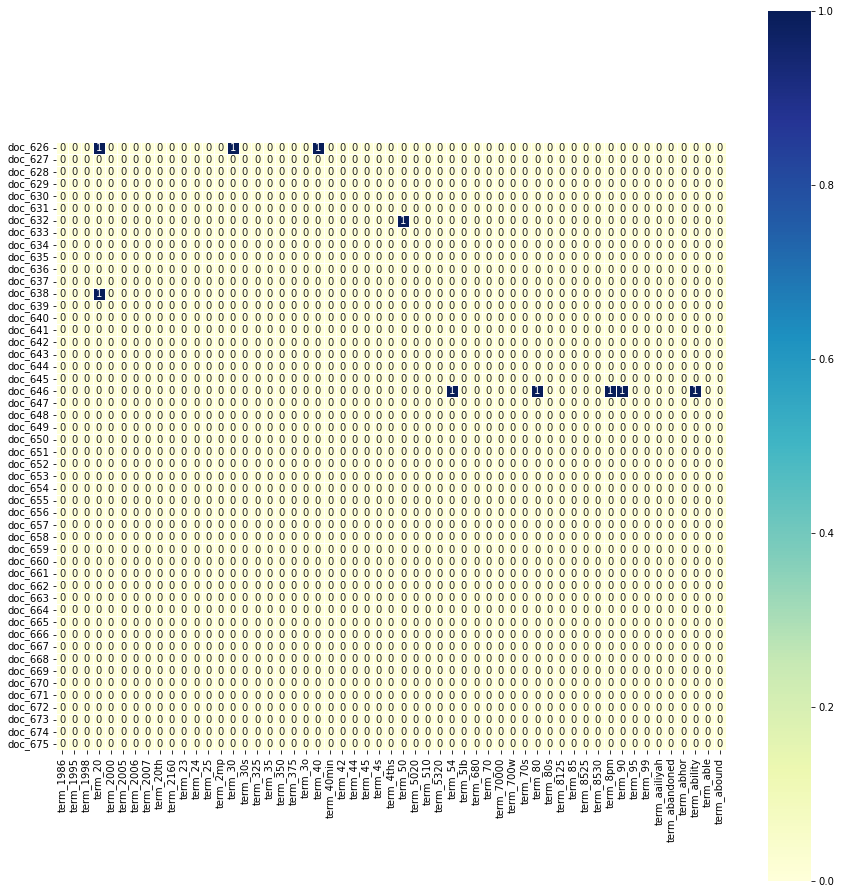

In [38]:
import seaborn as sns

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(15, 16))
ax = sns.heatmap(df_todraw,
                 cmap="YlGnBu",
                 vmin=0, vmax=1, annot=True, linewidth=1, linecolor='w', square=True)

# 5.4 Dimensionality Reduction
Since we have just touched on the concept of sparsity most naturally the problem of "curse of dimentionality" comes up. I am not going to get into the full details of what dimensionality reduction is and what it is good for just the fact that is an excellent technique for visualizing data efficiently (please refer to notes for more information). All I can say is that we are going to deal with the issue of sparsity with a few lines of code. And we are going to try to visualize our data more efficiently with the results.

We are going to make use of Principal Component Analysis to efficeintly reduce the dimensions of our data, with the main goal of "finding a projection that captures the largest amount of variation in the data." This concept is important as it is very useful for visualizing and observing the characteristics of our dataset. 
**Input:** Raw term-vector matrix

**Output:** Projections 

In [39]:
from sklearn.decomposition import PCA

In [40]:
all_data_reduced = PCA(n_components = 2).fit_transform(all_data_counts.toarray())

In [41]:
all_data_reduced.shape

(2714, 2)

In [42]:
companies=['amazon', 'imbd', 'yelps']

### Feature subset selection(Method: TF-IDF)

In [44]:
from sklearn.feature_extraction.text import TfidfVectorizer
vertorizer = TfidfVectorizer()
tfidf_matrix= vertorizer.fit_transform(all_data['sentence'])

from sklearn.metrics.pairwise import cosine_similarity
score=cosine_similarity(tfidf_matrix)

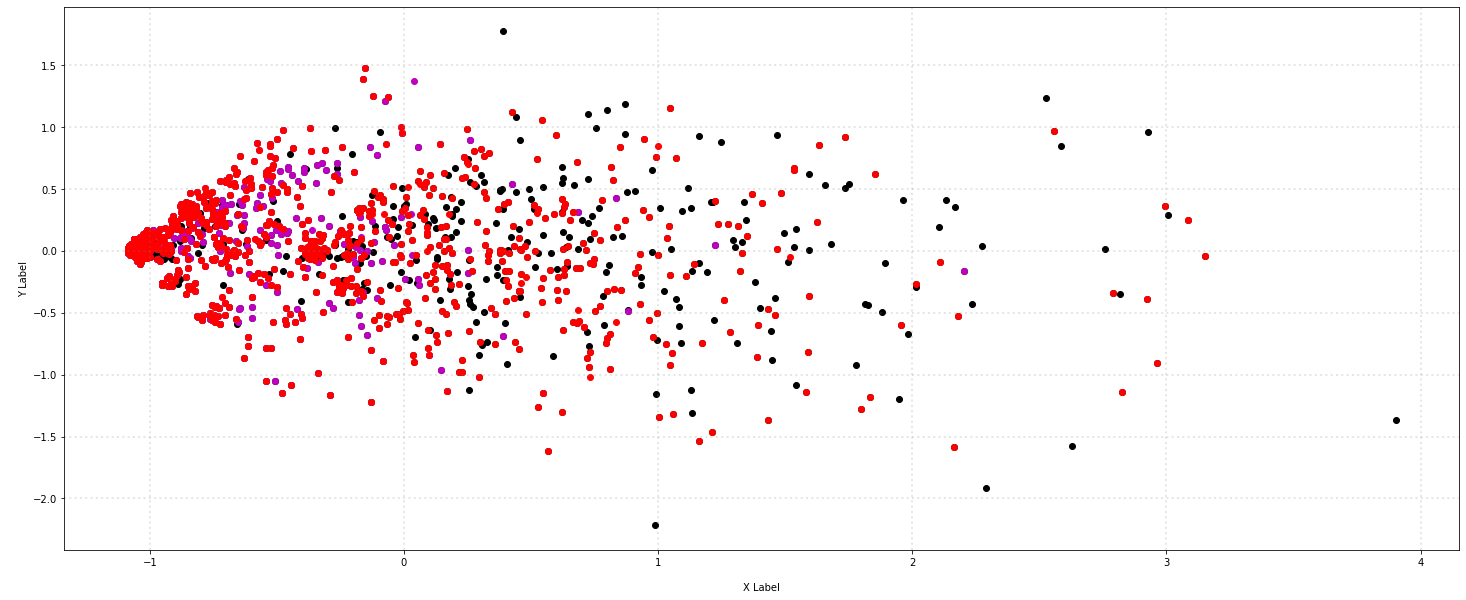

In [47]:
col = ['coral', 'black', 'm','red']

# plot
fig = plt.figure(figsize = (25,10))
ax = fig.subplots()

for c, d in zip(col, score):
    xs = all_data_reduced[all_data['score'] == d].T[0]
    ys = all_data_reduced[all_data['score'] == d].T[1]
   
    ax.scatter(xs, ys, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')

plt.show()

From the 2D visualization above, we can see a slight "hint of separation in the data"; i.e., they might have some special grouping by category, but it is not immediately clear. The PCA was applied to the raw frequencies and this is considered a very naive approach as some words are not really unique to a document. Only categorizing by word frequency is considered a "bag of words" approach. Later on in the course you will learn about different approaches on how to create better features from the term-vector matrix, such as term-frequency inverse document frequency so-called TF-IDF.

# 5.5 Atrribute Transformation / Aggregation
We can do other things with the term-vector matrix besides applying dimensionalaity reduction technique to deal with sparsity problem. Here we are going to generate a simple distribution of the words found in all the entire set of articles. Intuitively, this may not make any sense, but in data science sometimes we take some things for granted, and we just have to explore the data first before making any premature conclusions. On the topic of attribute transformation, we will take the word distribution and put the distribution in a scale that makes it easy to analyze patterns in the distrubution of words. Let us get into it!
First, we need to compute these frequencies for each term in all documents. Visually speaking, we are seeking to add values of the 2D matrix, vertically; i.e., sum of each column. You can also refer to this process as aggregation, which we won't explore further in this notebook because of the type of data we are dealing with. But I believe you get the idea of what that includes.  

In [48]:
# note this takes time to compute. You may want to reduce the amount of terms you want to compute frequencies for
term_frequencies = []
for j in range(0,all_data_counts.shape[1]):
    term_frequencies.append(sum(all_data_counts[:,j].toarray()))

In [49]:
term_frequencies = np.asarray(all_data_counts.sum(axis=0))[0]

D:\ProgramData\anaconda3\envs\env1\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
D:\ProgramData\anaconda3\envs\env1\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


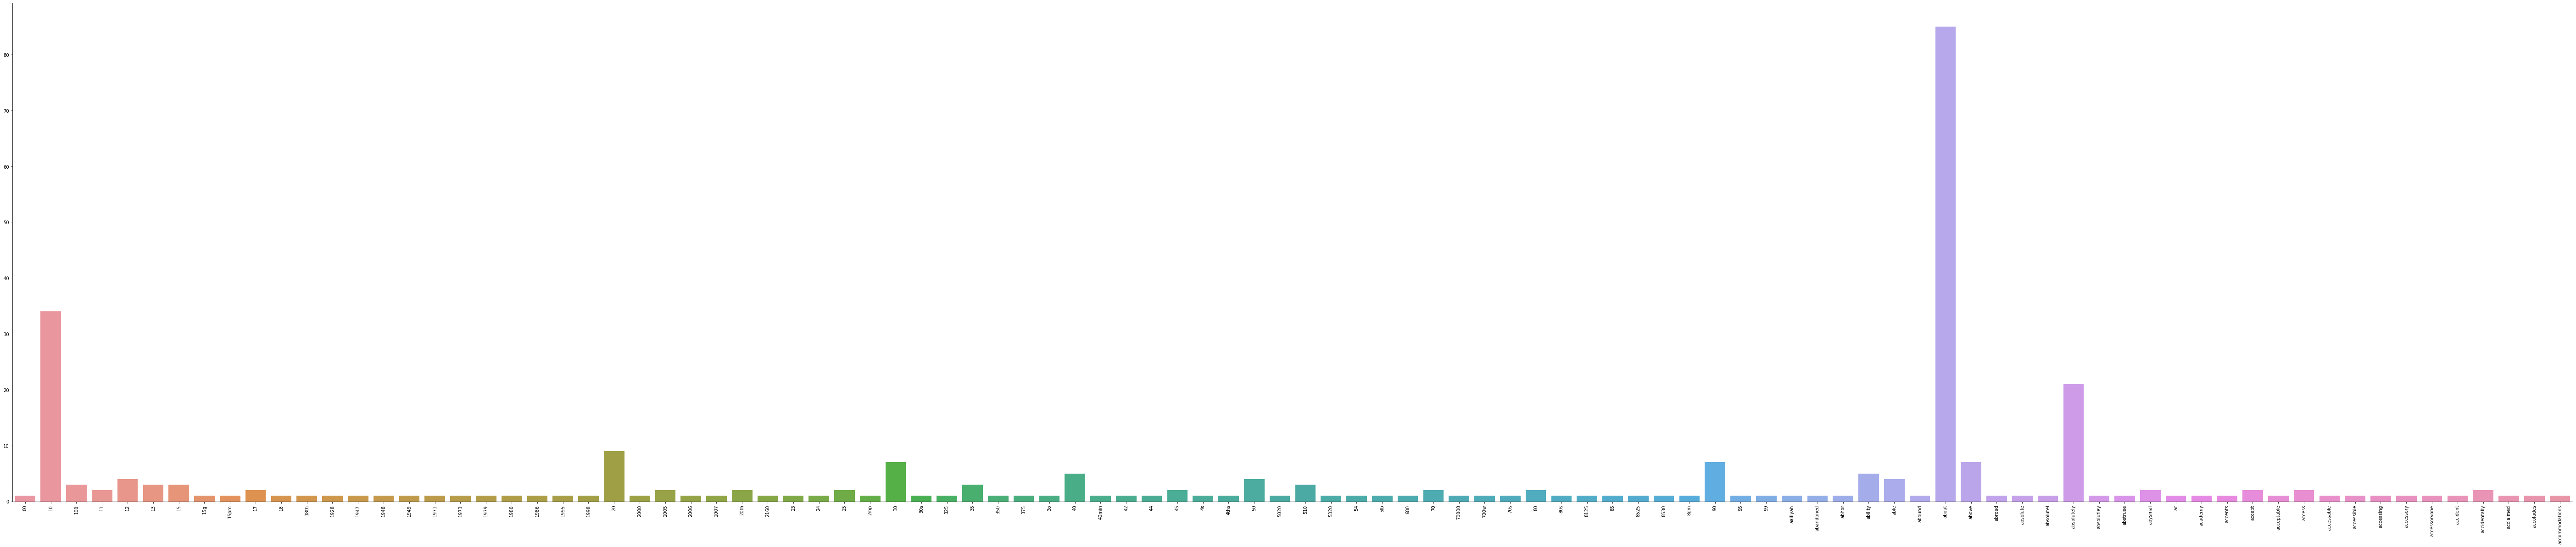

In [50]:
plt.subplots(figsize=(100, 20))
g = sns.barplot(x=count_vect.get_feature_names()[:100], 
            y=term_frequencies[:100])
g.set_xticklabels(count_vect.get_feature_names()[:100], rotation = 90);

to make it easier to visualize use long tail graph

In [52]:
# generate a simple distribution
count_vect = CountVectorizer(min_df=100)
#
all_data_counts = count_vect.fit_transform(all_data.sentence)
term_frequencies = []
for j in range(0,all_data_counts.shape[1]):
    term_frequencies.append(sum(all_data_counts[:,j].toarray()))

term_frequencies = np.asarray(all_data_counts.sum(axis=0))[0]

In [54]:
# try to reverse the term_frequencies array
sorted_array = np.sort(term_frequencies)
reverse_array = sorted_array[::-1]

D:\ProgramData\anaconda3\envs\env1\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


<AxesSubplot:>

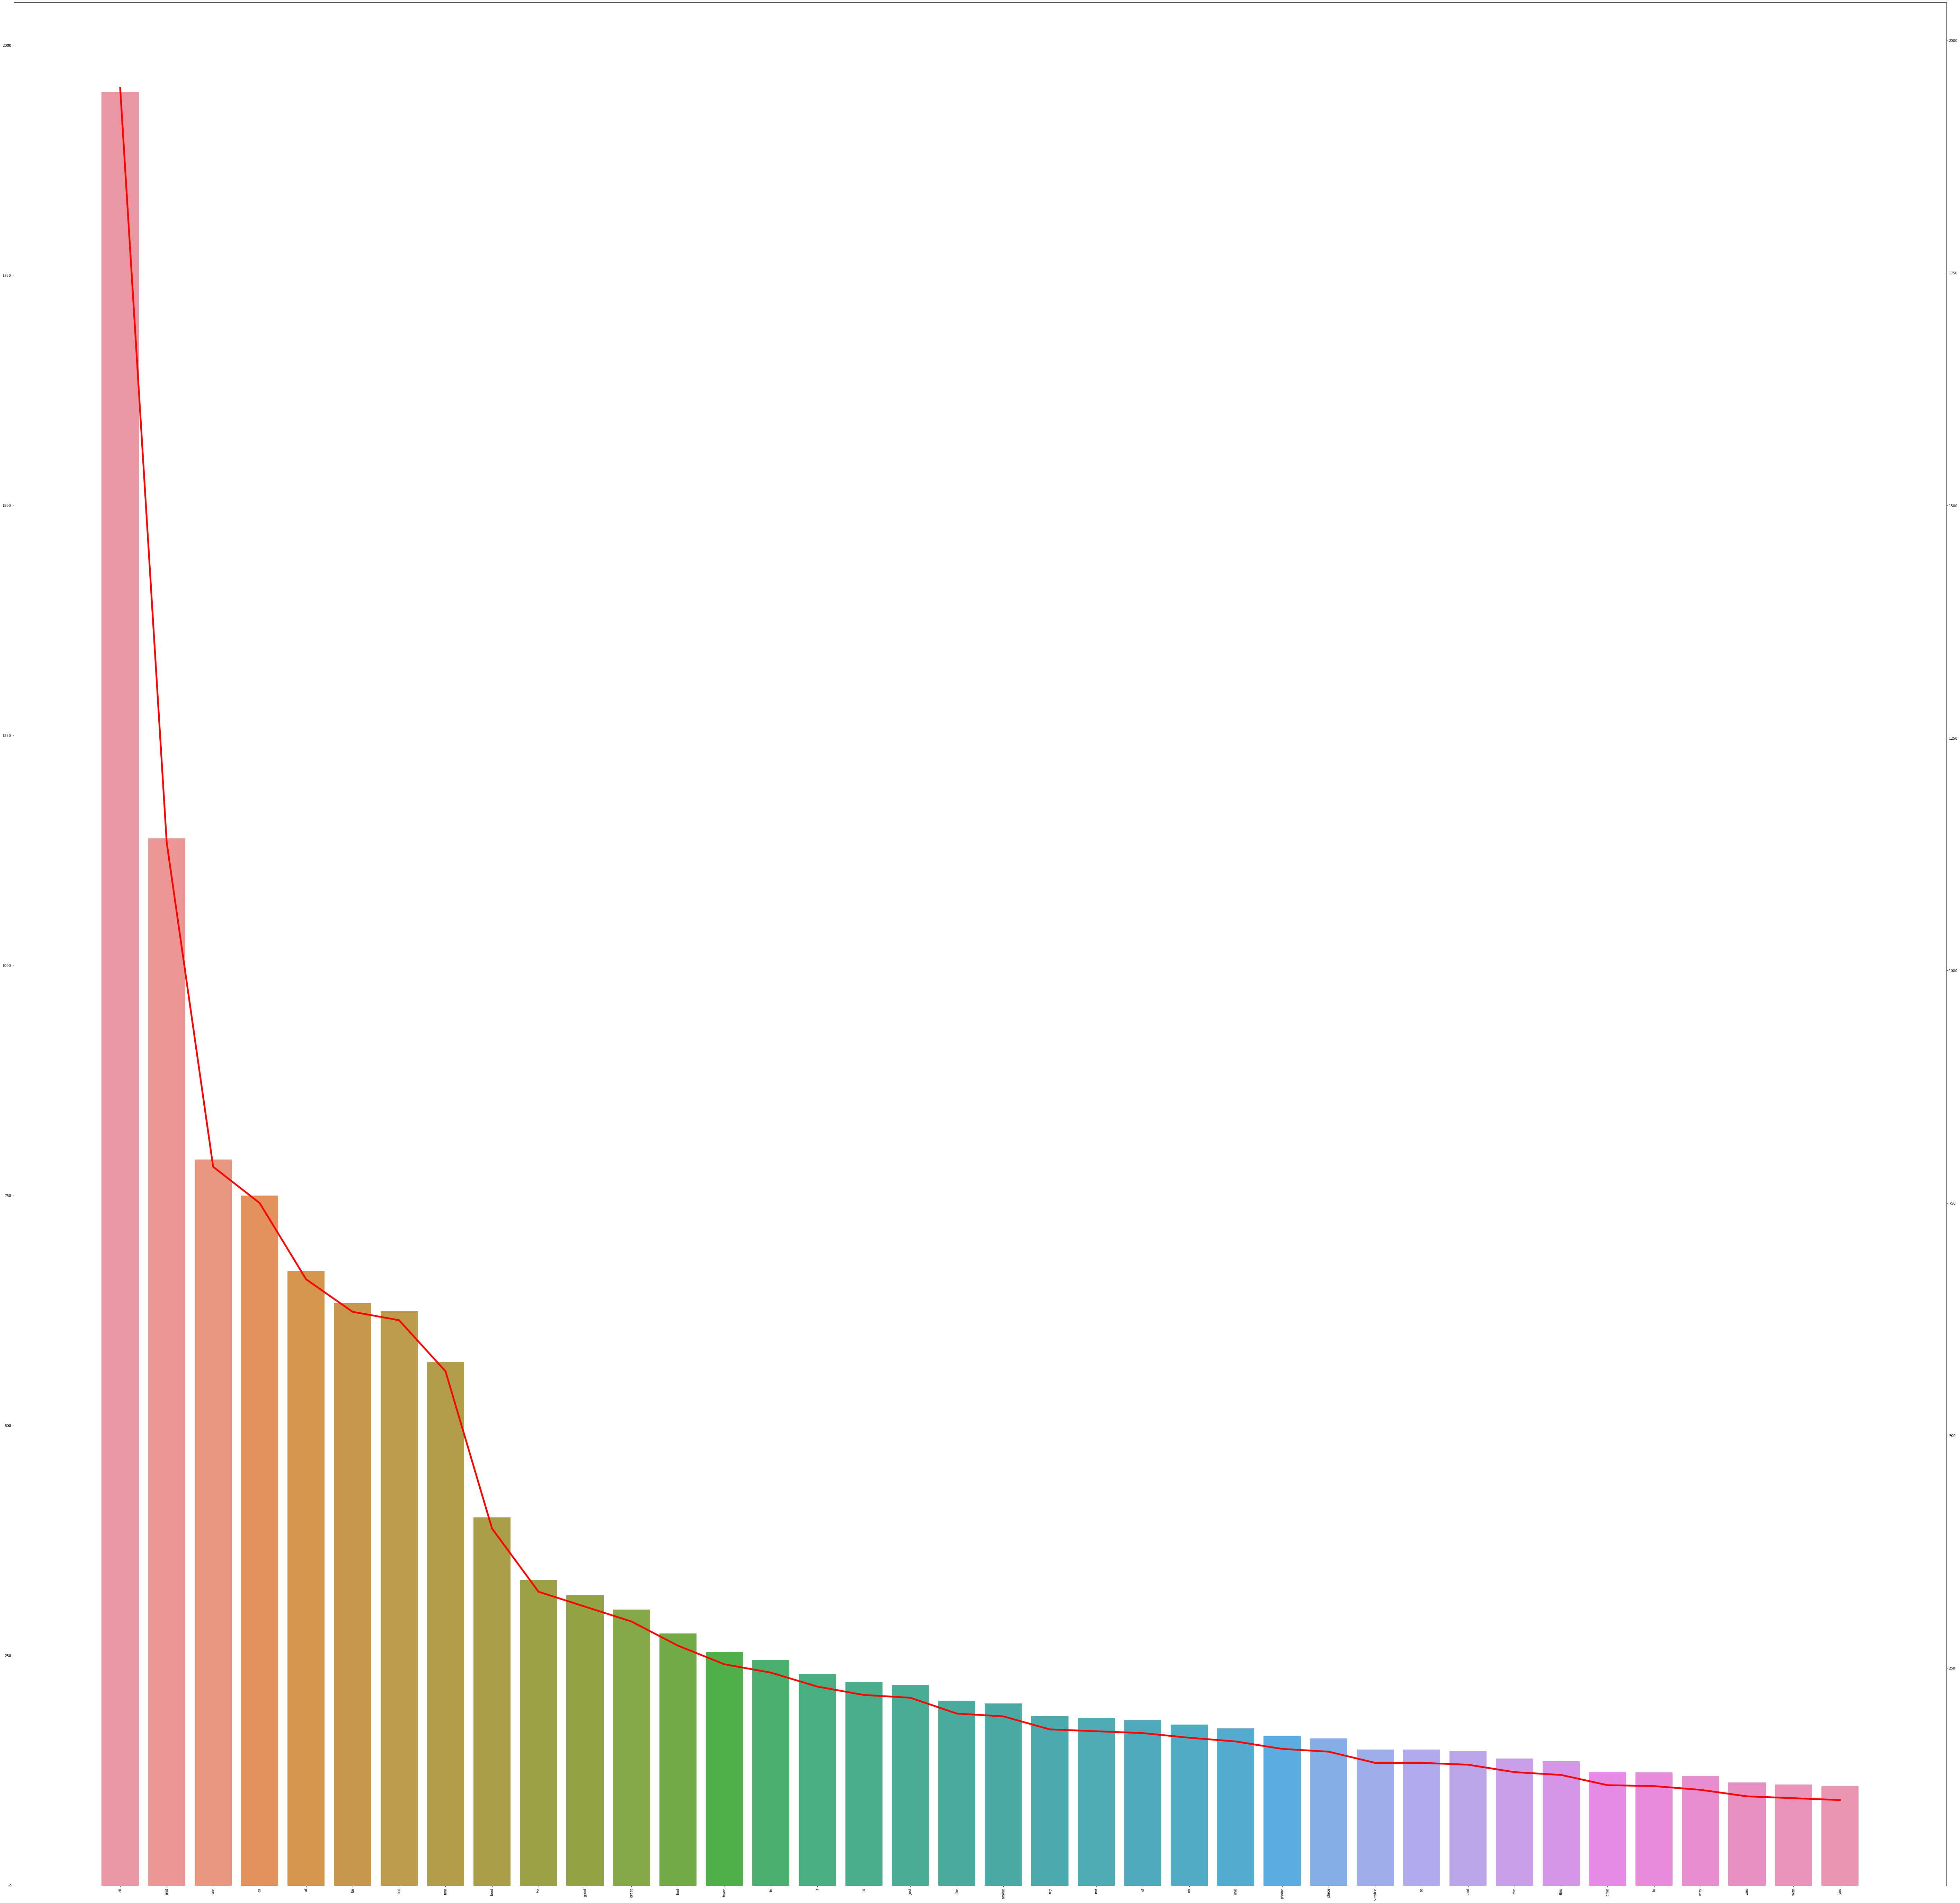

In [55]:
# create a long tail bar
ax1 = sns.set_style(style=None, rc=None )

fig, ax1 = plt.subplots(figsize=(100,100))
sns.barplot(x=count_vect.get_feature_names(),
            y=reverse_array, alpha=1.0)

plt.xticks(rotation=90)
ax2 = ax1.twinx()
sns.lineplot(x=count_vect.get_feature_names(),
           y=reverse_array, 
             color='red',linewidth=5)


# 5.6 Discretization and Binarization
In this section we are going to discuss a very important pre-preprocessing technique used to transform the data, specifically categorical values, into a format that satisfies certain criteria required by particular algorithms. Given our current original dataset, we would like to transform one of the attributes, `company`, into four binary attributes. In other words, we are taking the category name and replacing it with a `n` asymmetric binary attributes. The logic behind this transformation is discussed in detail in the recommended Data Mining text book (please refer to it on page 58). People from the machine learning community also refer to this transformation as one-hot encoding, but as you may become aware later in the course, these concepts are all the same, we just have different prefrence on how we refer to the concepts. Let us take a look at what we want to achieve in code. 

In [56]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy

In [57]:
mlb = preprocessing.LabelBinarizer()

In [59]:
mlb.fit(all_data.company)

LabelBinarizer()

In [62]:
mlb.classes_

array(['amazon', 'imdb', 'yelp'], dtype='<U6')

In [64]:
all_data['bin_company'] = mlb.transform(all_data['company']).tolist()

transform text data into binary

In [65]:
all_data[0:50]

,sentence,score,company,feel,Text_length,unigrams,bin_company
0,So there is no way for me to plug it in here i...,0,amazon,negative,82,"[So, there, is, no, way, for, me, to, plug, it...","[1, 0, 0]"
1,"Good case, Excellent value.",1,amazon,positive,27,"[Good, case, ,, Excellent, value, .]","[1, 0, 0]"
2,Great for the jawbone.,1,amazon,positive,22,"[Great, for, the, jawbone, .]","[1, 0, 0]"
3,Tied to charger for conversations lasting more...,0,amazon,negative,79,"[Tied, to, charger, for, conversations, lastin...","[1, 0, 0]"
4,The mic is great.,1,amazon,positive,17,"[The, mic, is, great, .]","[1, 0, 0]"
5,I have to jiggle the plug to get it to line up...,0,amazon,negative,74,"[I, have, to, jiggle, the, plug, to, get, it, ...","[1, 0, 0]"
6,If you have several dozen or several hundred c...,0,amazon,negative,111,"[If, you, have, several, dozen, or, several, h...","[1, 0, 0]"
7,If you are Razr owner...you must have this!,1,amazon,positive,43,"[If, you, are, Razr, owner, ..., you, must, ha...","[1, 0, 0]"
8,"Needless to say, I wasted my money.",0,amazon,negative,35,"[Needless, to, say, ,, I, wasted, my, money, .]","[1, 0, 0]"
9,What a waste of money and time!.,0,amazon,negative,32,"[What, a, waste, of, money, and, time, !, .]","[1, 0, 0]"


# 6. Data Exploration

Sometimes you need to take a peek at your data to understand the relationships in your dataset. Here, we will focus in a similarity example. Let's take 3 documents and compare them.

In [66]:
# We retrieve 2 sentences for a random record, here, indexed at 50 and 100
document_to_transform_1 = []
random_record_1 = all_data.iloc[50]
random_record_1 = random_record_1['sentence']
document_to_transform_1.append(random_record_1)

document_to_transform_2 = []
random_record_2 = all_data.iloc[100]
random_record_2 = random_record_2['sentence']
document_to_transform_2.append(random_record_2)

document_to_transform_3 = []
random_record_3 = all_data.iloc[150]
random_record_3 = random_record_3['sentence']
document_to_transform_3.append(random_record_3)

In [67]:
print(document_to_transform_1)
print(document_to_transform_2)
print(document_to_transform_3)

['good protection and does not make phone too bulky.']
['Buyer Beware, you could flush money right down the toilet.']
['Audio Quality is poor, very poor.']


In [68]:
from sklearn.preprocessing import binarize

# Transform sentence with Vectorizers
document_vector_count_1 = count_vect.transform(document_to_transform_1)
document_vector_count_2 = count_vect.transform(document_to_transform_2)
document_vector_count_3 = count_vect.transform(document_to_transform_3)

# Binarize vecors to simplify: 0 for abscence, 1 for prescence
document_vector_count_1_bin = binarize(document_vector_count_1)
document_vector_count_2_bin = binarize(document_vector_count_2)
document_vector_count_3_bin = binarize(document_vector_count_3)

# print
print("Let's take a look at the count vectors:")
print(document_vector_count_1.todense())
print(document_vector_count_2.todense())
print(document_vector_count_3.todense())

Let's take a look at the count vectors:
[[0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0
  0 0]]
[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
  0 1]]
[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
  0 0]]


In [69]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate Cosine Similarity
cos_sim_count_1_2 = cosine_similarity(document_vector_count_1, document_vector_count_2, dense_output=True)
cos_sim_count_1_3 = cosine_similarity(document_vector_count_1, document_vector_count_3, dense_output=True)
cos_sim_count_1_1 = cosine_similarity(document_vector_count_1, document_vector_count_1, dense_output=True)
cos_sim_count_2_2 = cosine_similarity(document_vector_count_2, document_vector_count_2, dense_output=True)

# Print 
print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2})
print("Cosine Similarity using count bw 1 and 3: %(x)f" %{"x":cos_sim_count_1_3})
print("Cosine Similarity using count bw 1 and 1: %(x)f" %{"x":cos_sim_count_1_1})
print("Cosine Similarity using count bw 2 and 2: %(x)f" %{"x":cos_sim_count_2_2})

Cosine Similarity using count bw 1 and 2: 0.000000
Cosine Similarity using count bw 1 and 3: 0.000000
Cosine Similarity using count bw 1 and 1: 1.000000
Cosine Similarity using count bw 2 and 2: 1.000000


Generate TF-IDF features from the tokens of each text.

`TfidfVectorizer` creates a dictionary from words provided to it and generates a matrix similar to the one above (X_counts), but rather than containing integer word counts, the matrix contains Term Frequency-Inverse Document Frequency (TFIDF) values between 0.0 and 1.0 reflecting the relative importance of individual words

In [70]:
cosine=cosine_similarity(tfidf_matrix,tfidf_matrix)

In [71]:
from sklearn.metrics.pairwise import linear_kernel
cosine_sim=linear_kernel(tfidf_matrix,tfidf_matrix)

In [72]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [73]:
tfidf_vect = TfidfVectorizer()
all_data_tfidf = tfidf_vect.fit_transform(all_data.sentence)

In [74]:
all_data_tfidf.shape

(2714, 5153)

In [75]:
all_data_tfidf[20:25, 0:100].toarray()

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.  

### There are four tests results
### Two naive_bayes models  X Two feature extration methods 


In [76]:
# implement two NB to do classification
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split

%matplotlib inline
from sklearn.metrics import plot_confusion_matrix

In [78]:
# alldata_counts belong to word frequency features 
X_train1, X_test1, Y_train1, Y_test1 = train_test_split(all_data_counts, all_data.score, test_size=0.25)


In [80]:
#choose BernoulliNB as my classification model
bnb_counts = BernoulliNB()
bnb_counts.fit(X_train1, Y_train1)

BernoulliNB()

In [81]:
bnb_counts.score(X_test1, Y_test1)

0.6347569955817378

D:\ProgramData\anaconda3\envs\env1\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


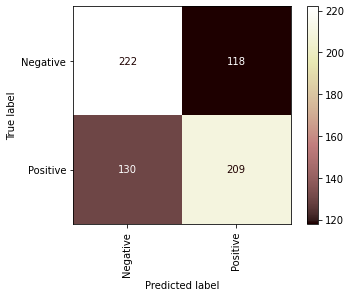

In [82]:
#Use bnb_counts to plot confusion_matrix
plot_confusion_matrix(bnb_counts, X_test1, Y_test1, display_labels=['Negative', 'Positive'], cmap='pink', xticks_rotation='vertical')

In [83]:
#choose MultinomialNB as my classification model
mnb_counts = MultinomialNB()
mnb_counts.fit(X_train1, Y_train1)

MultinomialNB()

In [84]:
mnb_counts.score(X_test1, Y_test1)

0.6082474226804123

D:\ProgramData\anaconda3\envs\env1\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


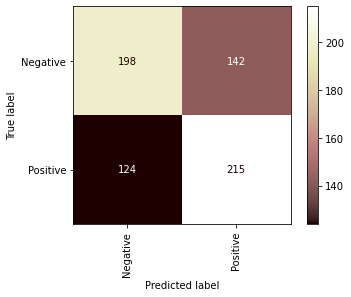

In [86]:
plot_confusion_matrix(mnb_counts, X_test1, Y_test1, display_labels=['Negative', 'Positive'], cmap='pink', xticks_rotation='vertical')

### Above result was shown that score of  MultinomialNB was worse than BernoulliNB if we use word frequency features  as feature extractor.

In [89]:
## alldata_tfidf belong to TFIDF features extraction 
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(all_data_tfidf, all_data.score, test_size=0.25)


In [90]:
#choose BernoulliNB as my classification model
bnb_tfidf = BernoulliNB(binarize=0.0)
bnb_tfidf.fit(X_train2, Y_train2)


BernoulliNB()

In [91]:
bnb_tfidf.score(X_test2, Y_test2)

0.8055964653902798

D:\ProgramData\anaconda3\envs\env1\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


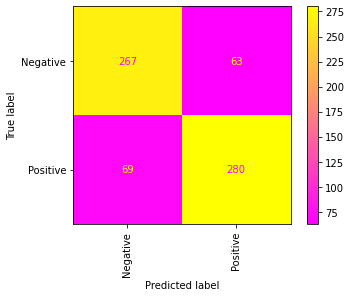

In [92]:
plot_confusion_matrix(bnb_tfidf, X_test2, Y_test2, display_labels=['Negative', 'Positive'], cmap='spring', xticks_rotation='vertical')

In [93]:
#choose MultinomialNB as my classification model
mnb_tfidf = MultinomialNB()
mnb_tfidf.fit(X_train2, Y_train2)

MultinomialNB()

In [94]:
mnb_tfidf.score(X_test2, Y_test2)

0.8232695139911634

D:\ProgramData\anaconda3\envs\env1\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


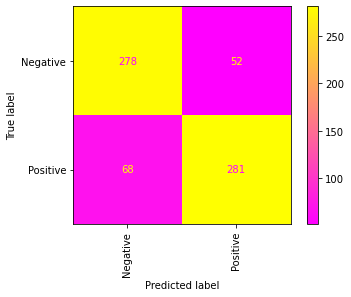

In [95]:
plot_confusion_matrix(mnb_tfidf, X_test2, Y_test2, display_labels=['Negative', 'Positive'], cmap='spring', xticks_rotation='vertical')

### Above result was shown that score of  MultinomialNB was better than BernoulliNB if we use TF-IDF  as feature extractor.

# Conclusion

Compare score of TWO feature extractions and TWO classifiers(total four combinations),  the best performance is to combine TF-IDF and MultinomialNB.